# Guided Project: Credit Card Customer Segmentation

Solution notebook can be referenced [here](https://github.com/dataquestio/solutions/blob/master/Mission745Solutions.ipynb).

## Introduction

In this guided project, we’ll play the role of a data scientist working for a credit card company. The dataset contains information about the company’s clients and we're asked to help segment them into different groups in order to apply different business strategies for each type of customer.

The data engineering team has already cleaned most of the data, and it was decided that we should use the K-means algorithm to segment the data.

The company expects to receive a group for each client and an explanation of the characteristics of each group and the main points that make them different.

In order to use the algorithm properly and achieve all the goals that the company has set for us, we'll go through the following steps:

* Analyze the dataset;
* Prepare the data for modeling;
* Find an appropriate number of clusters;
* Segment the data;
* Interpret and explain the results.

Here's the data dictionary:

* `customer_id`: unique identifier for each customer.
* `age`: customer age in years.
* `gender`: customer gender (M or F).
* `dependent_count`: number of dependents of each customer.
* `education_level`: level of education ("High School", "Graduate", etc.).
* `marital_status`: marital status ("Single", "Married", etc.).
* `estimated_income`: the estimated income for the customer projected by the data science team.
* `months_on_book`: time as a customer in months.
* `total_relationship_count`: number of times the customer contacted the company.
* `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
* `credit_limit`: customer's credit limit.
* `total_trans_amount`: the overall amount of money spent on the card by the customer.
* `total_trans_count`: the overall number of times the customer used the card.
* `avg_utilization_ratio`: daily average utilization ratio.

In [1]:
## Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
## load dataset

cc_data_raw = pd.read_csv('customer_segmentation.csv')
cc_data_raw.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [3]:
cc_data_raw.shape

(10127, 14)

In [4]:
cc_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [5]:
cc_data_raw.describe(include = 'all')

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127,10127.000000,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,NaN,2,NaN,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NaN,Graduate,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5358,NaN,3685,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,46.325960,NaN,2.346203,NaN,NaN,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,NaN,1.298908,NaN,NaN,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,NaN,0.000000,NaN,NaN,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,NaN,1.000000,NaN,NaN,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,NaN,2.000000,NaN,NaN,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,NaN,3.000000,NaN,NaN,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000


In [6]:
numeric_cols = cc_data_raw.select_dtypes('number').columns
print(numeric_cols.shape)
numeric_cols

(11,)


Index(['customer_id', 'age', 'dependent_count', 'estimated_income',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'credit_limit', 'total_trans_amount', 'total_trans_count',
       'avg_utilization_ratio'],
      dtype='object')

In [7]:
categorical_cols = cc_data_raw.select_dtypes('object').columns
print(categorical_cols.shape)
categorical_cols

(3,)


Index(['gender', 'education_level', 'marital_status'], dtype='object')

In [8]:
for col in categorical_cols:
    print(cc_data_raw[col].value_counts(normalize = True))
    print()

F    0.529081
M    0.470919
Name: gender, dtype: float64

Graduate         0.363879
High School      0.232152
Uneducated       0.173299
College          0.117705
Post-Graduate    0.060827
Doctorate        0.052138
Name: education_level, dtype: float64

Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: marital_status, dtype: float64



Up to this point, we can see that:

1. There are `10127` observations for `14` fields in the dataset. 
2. No missing value is present. 
3. There are `11` numeric variables and `3` categorical variables.   
4. However, considering we want to compute the distances between customers, the `customer_id` column does not provide a meaningful value for this context. 

In [9]:
## Drop customer_id column

cc_data = cc_data_raw.drop('customer_id', axis = 1)
cc_data.columns

Index(['age', 'gender', 'dependent_count', 'education_level', 'marital_status',
       'estimated_income', 'months_on_book', 'total_relationship_count',
       'months_inactive_12_mon', 'credit_limit', 'total_trans_amount',
       'total_trans_count', 'avg_utilization_ratio'],
      dtype='object')

<AxesSubplot:>

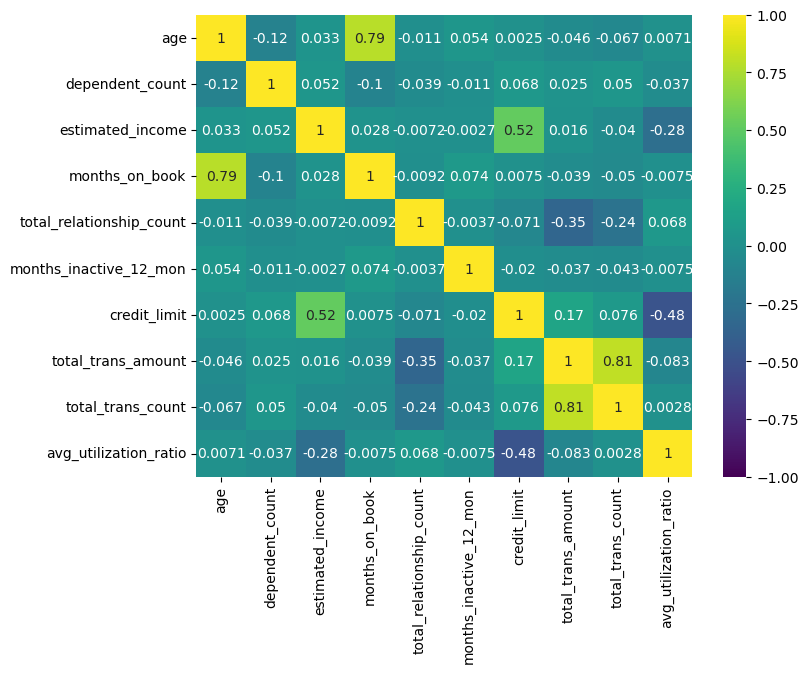

In [10]:
%matplotlib inline

## Plot the correlation coef between the numeric vars

plt.figure(figsize = (8,6))
corrs = cc_data.corr()
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "viridis", annot = True)

Some correlations that we can identify include:
* (+) `age` vs. `months_on_book` - People need to be old enough to become a customer with a long history. 
* (+) `credit_limit` vs. `estimated_income` - People receive a higher credit limit if they are proven to be able to afford. 
* (+) `total_trans_amount` vs. `total_trans_count` - The total amount of transactions tend to increase with the total count of transactions. 
* (-) `credit_limit` vs. `avg_utilization_ratio` - Those with lower credit limits will have a relatively high averaged ratio of utilization. 

In [11]:
numeric_cols_updt = cc_data.select_dtypes('number').columns
print(numeric_cols_updt.shape)
numeric_cols_updt

(10,)


Index(['age', 'dependent_count', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio'],
      dtype='object')

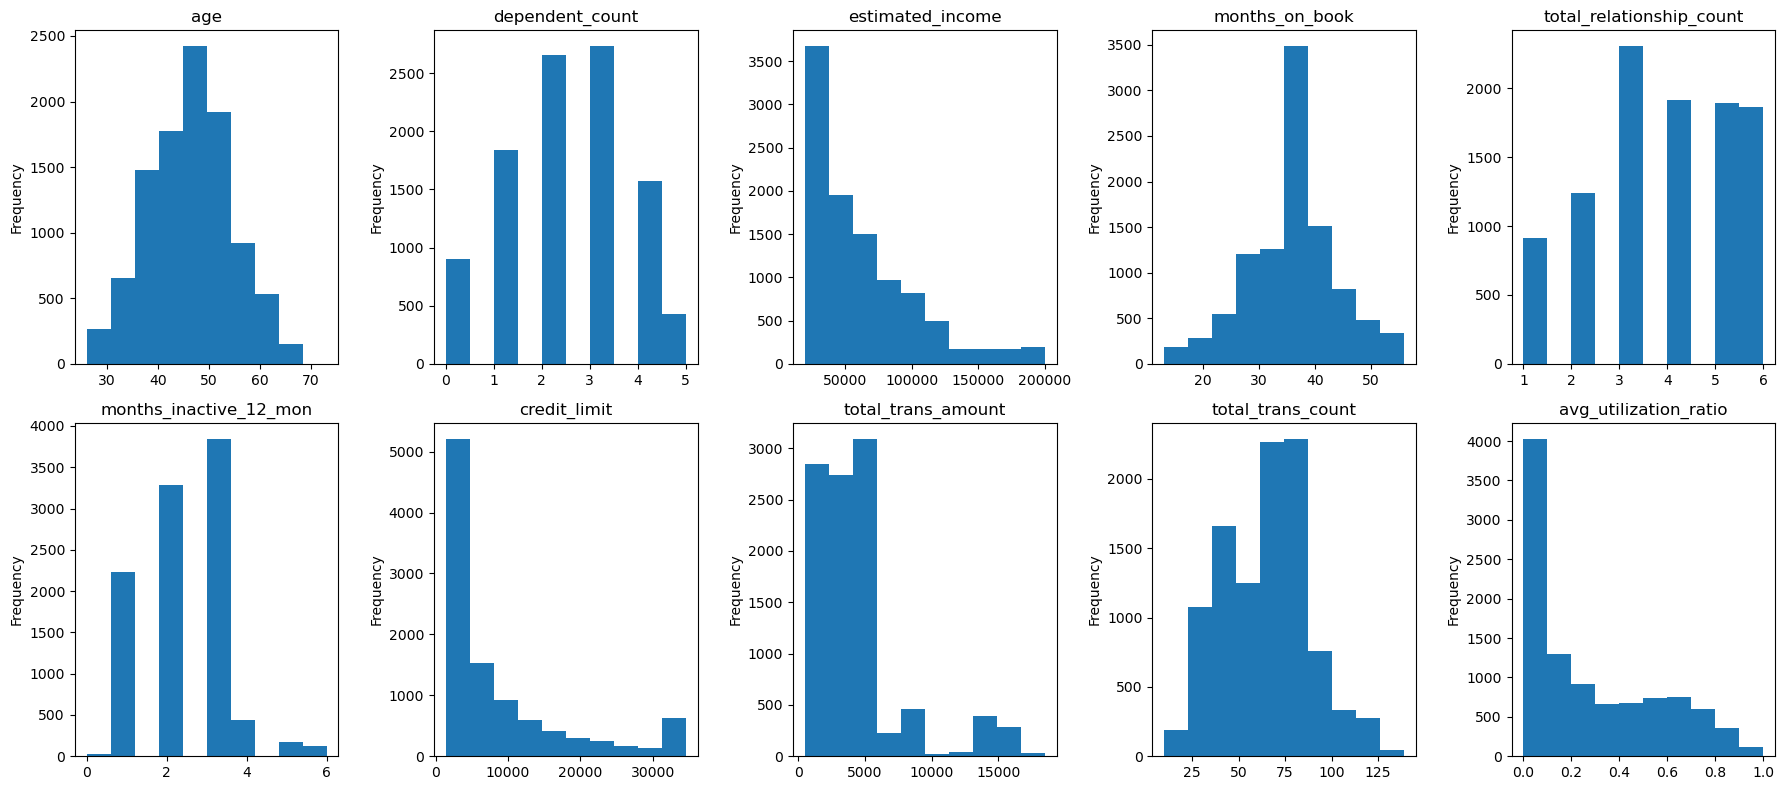

In [12]:
## Plot the distribution of the numeric vars

plt.figure(figsize = (18,8))

for i, col in enumerate(numeric_cols_updt):
    
    plt.subplot(2,5,i+1)
    cc_data[col].plot.hist()
    plt.title(f'{col}')

plt.tight_layout()

/tmp/ipykernel_443/224345609.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  cc_data[numeric_cols_updt].hist(ax = ax)


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dependent_count'}>,
        <AxesSubplot:title={'center':'estimated_income'}>],
       [<AxesSubplot:title={'center':'months_on_book'}>,
        <AxesSubplot:title={'center':'total_relationship_count'}>,
        <AxesSubplot:title={'center':'months_inactive_12_mon'}>],
       [<AxesSubplot:title={'center':'credit_limit'}>,
        <AxesSubplot:title={'center':'total_trans_amount'}>,
        <AxesSubplot:title={'center':'total_trans_count'}>],
       [<AxesSubplot:title={'center':'avg_utilization_ratio'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

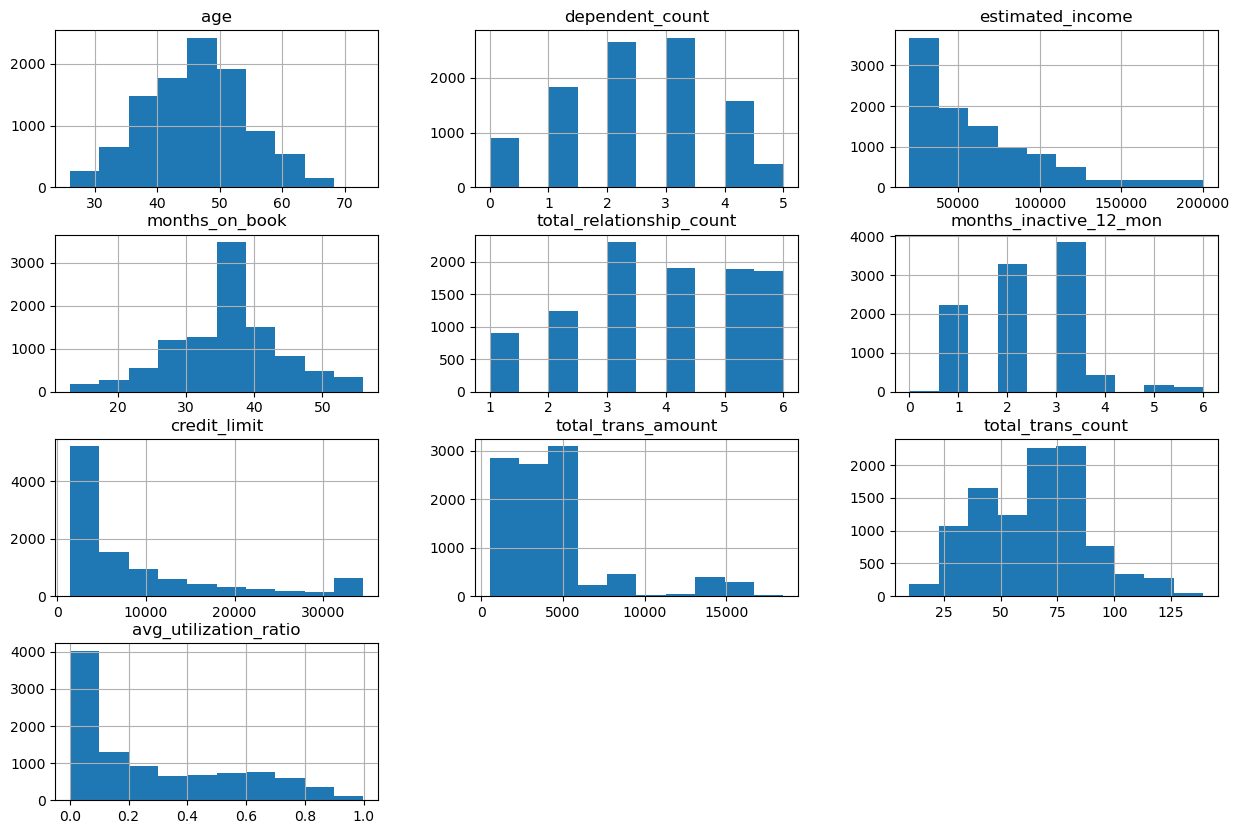

In [13]:
## Can directly pass in ax to arrange the plots for different cols

fig, ax = plt.subplots(figsize = (15,10))
cc_data[numeric_cols_updt].hist(ax = ax)

It can be observed that for the `10` numeric variables:
* `age`, `dependent_count` and `months_on_book` appear to be close to a normal distribution.
* `estimated_income`, `credit_limit`, `total_trans_amount` and `avg_utilization_ratio` are heavily right skewed. 

## Feature Engineering

In [14]:
categorical_cols

Index(['gender', 'education_level', 'marital_status'], dtype='object')

For the three categorical variables, we can see that:
* `gender` only has two levels: `M` or `F` -> `1` or `0`
* `education_level` has six levels but can be ranked, thus ordinal -> `0-5`
* `marital_status` has four levels which are completely nominal. -> one-hot encoding

In [15]:
## clean gender

cc_data_modif = cc_data.copy()

cc_data_modif['gender'] = cc_data_modif['gender'].replace({'M':1, 'F':0})
cc_data_modif['gender'].value_counts(normalize = True)

0    0.529081
1    0.470919
Name: gender, dtype: float64

In [16]:
## clean education_level

edu_level_map = {
    'Uneducated' : 0,
    'High School' : 1,
    'College' : 2,
    'Graduate': 3,
    'Post-Graduate' : 4,
    'Doctorate' : 5
}

cc_data_modif['education_level'] = cc_data_modif['education_level'].replace(edu_level_map)
cc_data_modif['education_level'].value_counts(normalize = True)

3    0.363879
1    0.232152
0    0.173299
2    0.117705
4    0.060827
5    0.052138
Name: education_level, dtype: float64

In [17]:
# clean marital_status

cc_data_modif = pd.get_dummies(cc_data_modif, columns = ['marital_status'], drop_first = True)
cc_data_modif.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0


In [18]:
cc_data_modif.shape

(10127, 15)

## Scaling the Data

In [19]:
## Using standardization scaling

scaler = StandardScaler()
cc_data_scaled = scaler.fit_transform(cc_data_modif)
cc_data_scaled[:10]

array([[-0.16540558,  1.05995565,  0.50336813, -0.75221102,  0.1758098 ,
         0.38462088,  0.76394261, -1.32713603,  0.4466219 , -0.95970657,
        -0.97389518, -0.77588223,  1.07733799, -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867,  0.66278684, -0.96716585,
         1.01071482,  1.40730617, -1.32713603, -0.04136665, -0.91643261,
        -1.35734038, -0.61627565, -0.92821381,  1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813,  0.66278684,  0.78539682,
         0.00896451,  0.12057905, -1.32713603, -0.5736978 , -0.74098169,
        -1.91120566, -0.99715499,  1.07733799, -0.79850685, -0.28260887],
       [-0.78912553, -0.9434357 ,  1.2732834 , -0.75221102, -0.63697289,
        -0.24147306, -0.52278451,  1.64147829, -0.58525108, -0.95175829,
        -1.91120566,  1.75968594, -0.92821381, -0.79850685,  3.53845931],
       [-0.78912553,  1.05995565,  0.50336813, -1.45970995,  0.07421197,
        -1.86931731,  0.76394261, -1.32713603, 

## Choosing K

In [20]:
inertias = []

## test out 1-20 centroids

for k in range(1,21):
    
    model = KMeans(n_clusters = k)
    clusters = model.fit_predict(cc_data_scaled)
    inertias.append(model.inertia_)

Text(0.5, 1.0, 'Inertia for varying number of clusters')

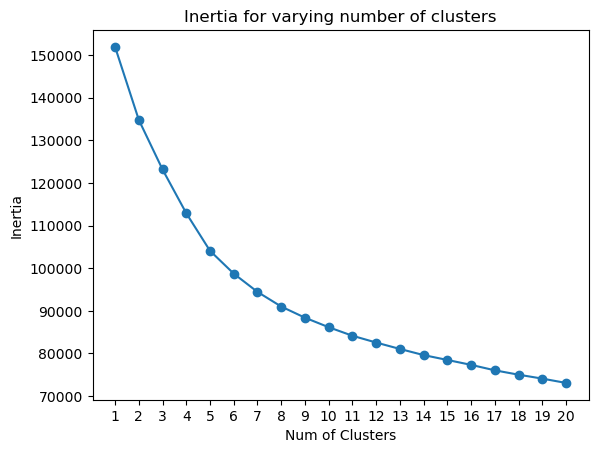

In [21]:
plt.plot(range(1,21), inertias, marker = 'o')
plt.xlabel('Num of Clusters')
plt.xticks(range(1,21))
plt.ylabel('Inertia')
plt.title('Inertia for varying number of clusters')

Text(0.5, 1.0, 'Inertia for varying number of clusters')

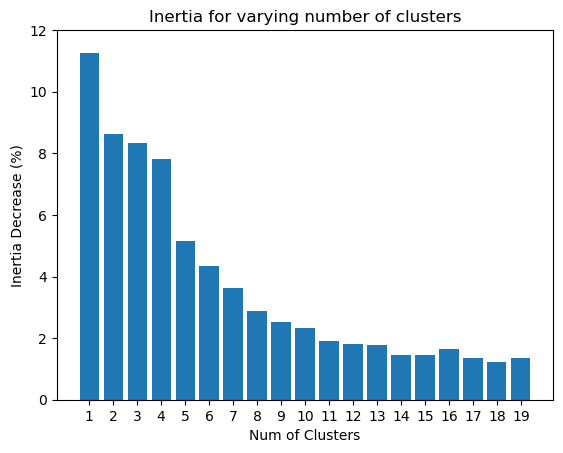

In [22]:
## plot also the decrease of inertia

inertia_decrease = []

for i in range(1, len(inertias)):
    
    decrease = (inertias[i-1] - inertias[i])/inertias[i-1]*100
    inertia_decrease.append(decrease)
    
plt.bar(range(1,len(inertias)), inertia_decrease)
plt.xlabel('Num of Clusters')
plt.xticks(range(1,len(inertias)))
plt.ylabel('Inertia Decrease (%)')
plt.ylim((0,12))
plt.title('Inertia for varying number of clusters')

It seems that when the number of clusters increases beyond `7` there is no substantial decrease in the inertia. 

In [23]:
## We will go with 6 clusters
## The exact numbering of the clusters are random
## Seed needs to be set for reproducibility

np.random.seed(1)

model = KMeans(n_clusters = 6)
clusters = model.fit_predict(cc_data_scaled)
clusters

array([4, 3, 4, ..., 5, 2, 5], dtype=int32)

## Analyzing Results

In [24]:
cc_data_raw['CLUSTER'] = clusters
cc_data_raw

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,4
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,3
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,4
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,2
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462,1
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511,5
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000,5
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000,2


In [25]:
## Group each numeric variable by the CLUSTER column and plot a bar chart. 

avg_clustered = cc_data_raw.groupby('CLUSTER')[numeric_cols_updt].mean().reset_index()
avg_clustered

,CLUSTER,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,0,57.126556,1.182573,51062.240664,45.914938,4.117566,2.441909,4830.821923,2859.789765,52.669433,0.353586
1,1,45.362637,2.312088,69015.384615,35.221978,2.176923,2.191209,14647.053846,13302.428571,106.842857,0.167108
2,2,45.642466,2.546575,61679.452055,35.273973,3.808219,2.336986,9191.696027,4447.876712,65.869863,0.259185
3,3,43.952209,2.455020,46665.060241,33.764257,3.914458,2.329719,4851.336948,3765.280321,65.344177,0.330571
4,4,46.815968,2.562288,114551.528879,36.289921,4.036240,2.386183,20379.506116,3302.197622,56.934315,0.072114
5,5,43.023698,2.674686,46142.190305,32.851346,3.956912,2.320646,4424.284632,3556.745781,61.794973,0.352176


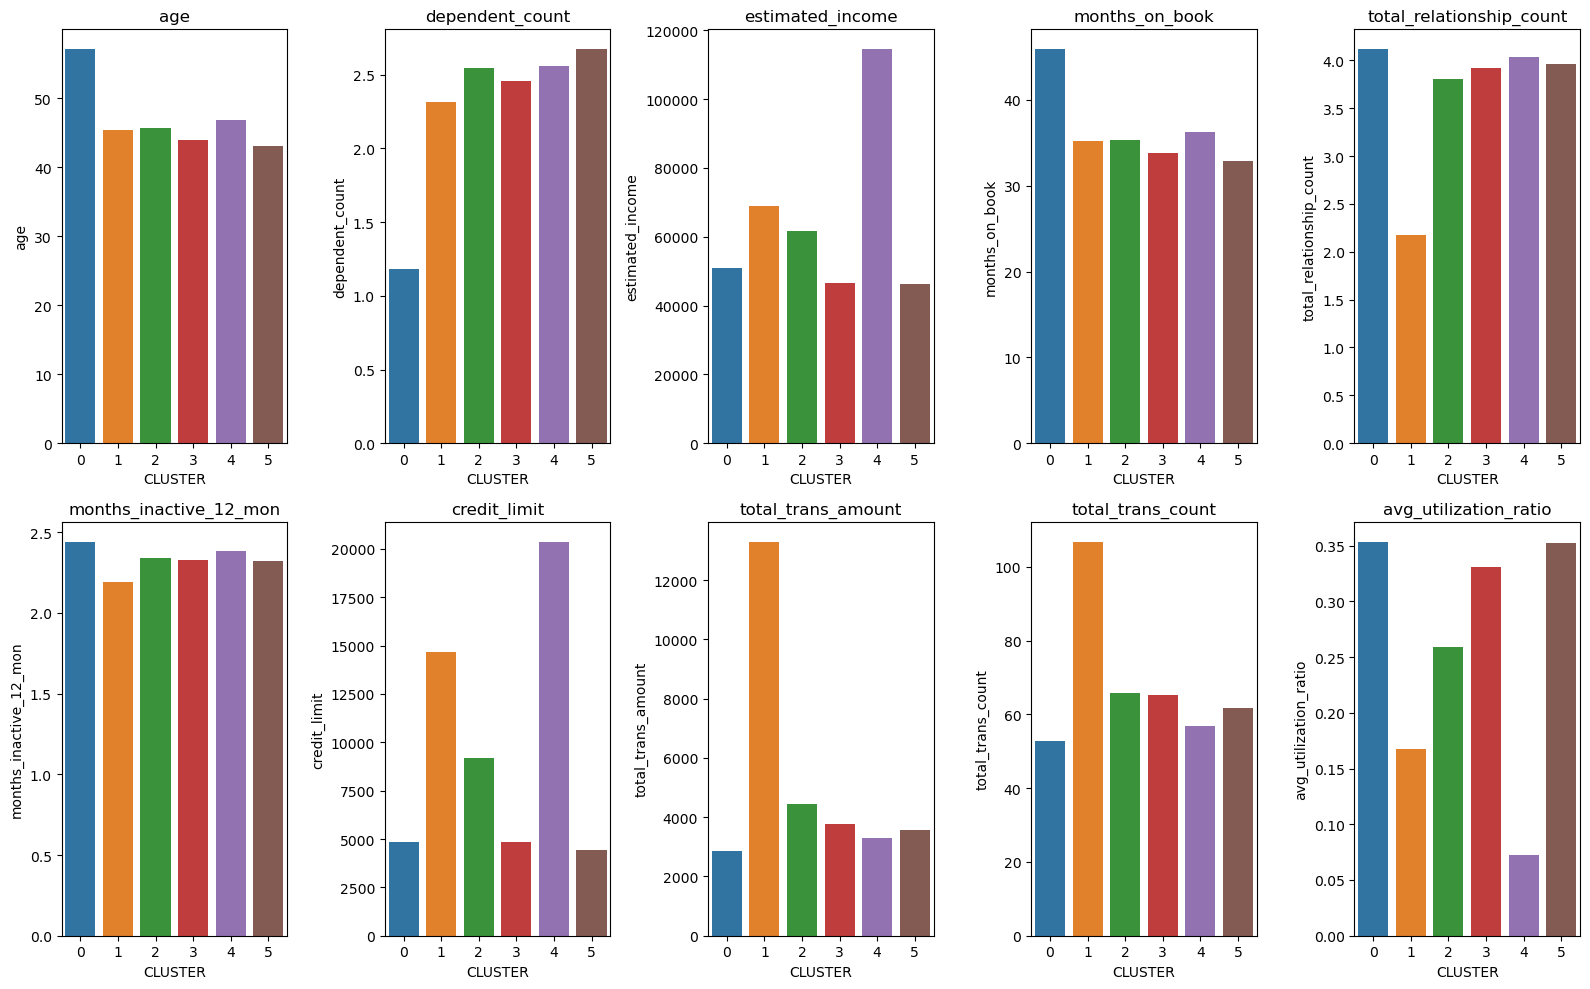

In [26]:
plt.figure(figsize = (16,10))

for i, col in enumerate(numeric_cols_updt):
    
    plt.subplot(2,5,i+1)
    sns.barplot(data = avg_clustered, x = 'CLUSTER', y = col)
    plt.title(f'{col}')
    

plt.tight_layout()

Comparing the averaged numeric variables by cluster, we can see that:

1. Cluster 4 has people with the highest `estimated_income` and `credit_limit`.
2. The inactive months are about the same across different clusters on average.
3. People in cluster 5 has a high `dependent_count` but low `credit_limit`.  

In [27]:
## Create a scatter plot with different colors for each cluster of pairs of variables with a high correlation

corrs

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
age,1.000000,-0.122254,0.032922,0.788912,-0.010931,0.054361,0.002476,-0.046446,-0.067097,0.007114
dependent_count,-0.122254,1.000000,0.051620,-0.103062,-0.039076,-0.010768,0.068065,0.025046,0.049912,-0.037135
estimated_income,0.032922,0.051620,1.000000,0.027628,-0.007181,-0.002703,0.515863,0.015861,-0.039988,-0.277532
months_on_book,0.788912,-0.103062,0.027628,1.000000,-0.009203,0.074164,0.007507,-0.038591,-0.049819,-0.007541
total_relationship_count,-0.010931,-0.039076,-0.007181,-0.009203,1.000000,-0.003675,-0.071386,-0.347229,-0.241891,0.067663
months_inactive_12_mon,0.054361,-0.010768,-0.002703,0.074164,-0.003675,1.000000,-0.020394,-0.036982,-0.042787,-0.007503
credit_limit,0.002476,0.068065,0.515863,0.007507,-0.071386,-0.020394,1.000000,0.171730,0.075927,-0.482965
total_trans_amount,-0.046446,0.025046,0.015861,-0.038591,-0.347229,-0.036982,0.171730,1.000000,0.807192,-0.083034
total_trans_count,-0.067097,0.049912,-0.039988,-0.049819,-0.241891,-0.042787,0.075927,0.807192,1.000000,0.002838
avg_utilization_ratio,0.007114,-0.037135,-0.277532,-0.007541,0.067663,-0.007503,-0.482965,-0.083034,0.002838,1.000000


In [28]:
high_corr_pairs = []

for x, corr in corrs.iteritems():
    
    high_corrs = corr[(abs(corr) > 0.4) & (abs(corr) < 1)]
    for y in high_corrs.index:
        if x < y :
            high_corr_pairs.append((x, y))
            
high_corr_pairs

[('age', 'months_on_book'),
 ('credit_limit', 'estimated_income'),
 ('total_trans_amount', 'total_trans_count'),
 ('avg_utilization_ratio', 'credit_limit')]

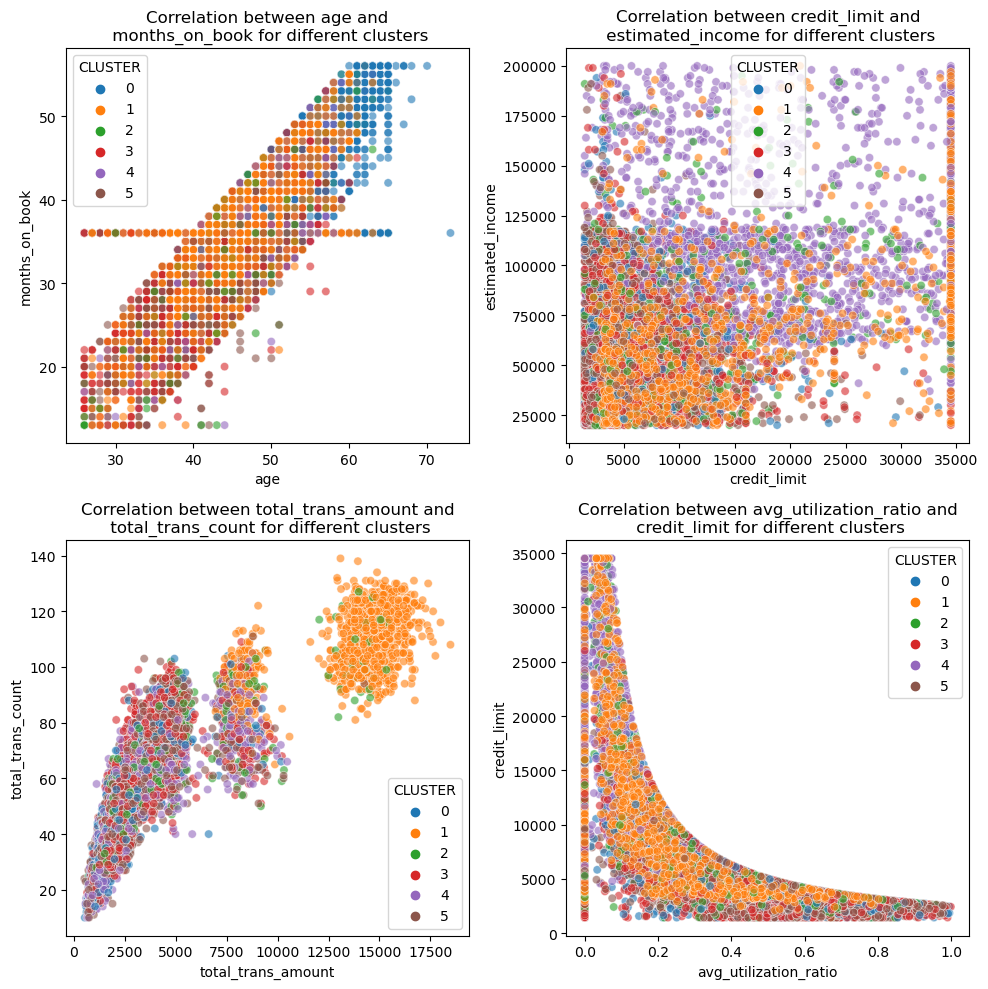

In [29]:
plt.figure(figsize = (10,10))

for i, (x, y) in enumerate(high_corr_pairs):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(data = cc_data_raw, x = x, y = y, hue = 'CLUSTER', 
                    palette = 'tab10', alpha = 0.6)
    plt.title(f'Correlation between {x} and\n {y} for different clusters')

plt.tight_layout()

From the scatter plot for highly correlated numeric variables, we can see that:

1. Cluster `0` mainly include older people with a long credit history. 
2. Cluster `1` comprises of people with frequent transactions and a high `total_trans_amount`. 

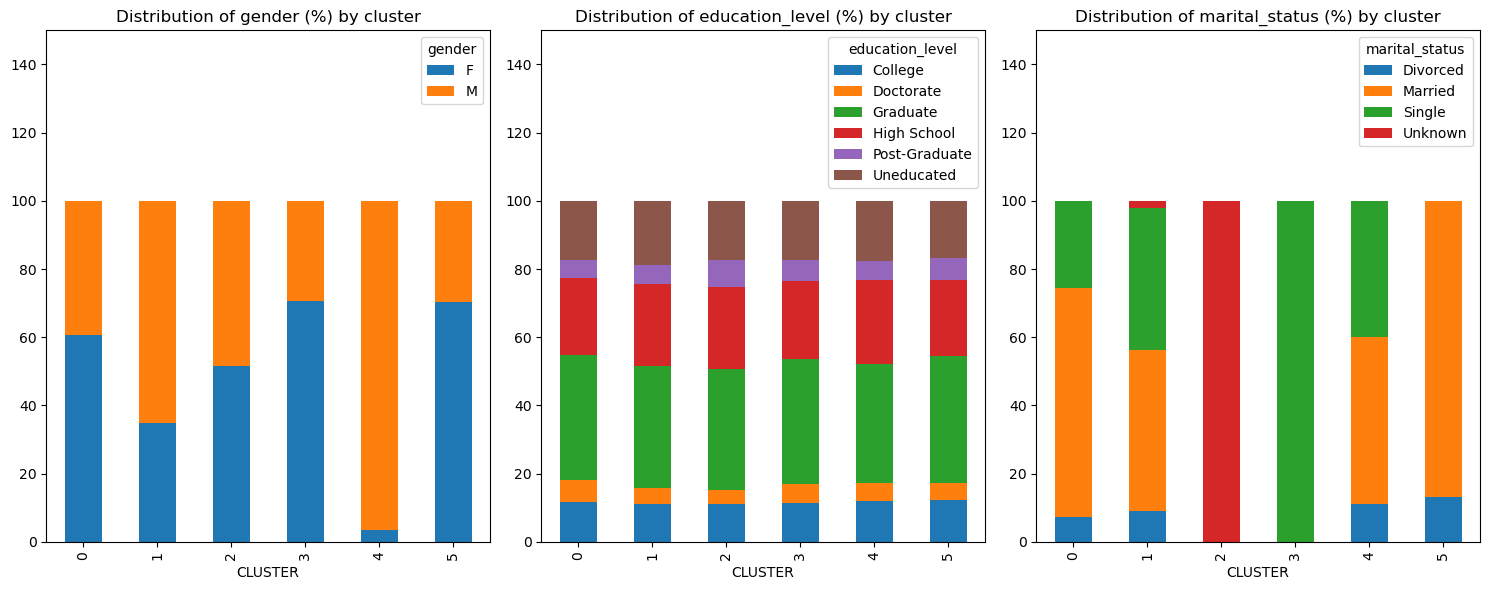

In [30]:
## Calculate the percentual distribution of each variable per cluster for the categorical columns

plt.figure(figsize = (15,6))

for i, col in enumerate(categorical_cols):
    
    class_dist_clustered = pd.crosstab(index = [cc_data_raw['CLUSTER']], columns = [cc_data_raw[col]], 
                                normalize = 'index')*100
    ax = plt.subplot(1,3,i+1)
    class_dist_clustered.plot.bar(stacked = True, ax = ax)
    plt.ylim(0,150)
    plt.title(f'Distribution of {col} (%) by cluster')

plt.tight_layout()

From the distribution of different categories in each cluster, we can see that:

1. No difference is observed with respect to `education_level` across all clusters;
2. Cluster `4` appears to be predominatly male. 
3. Cluster `2` groups all people with `Unknown` in their `marital_status` whereas cluster `3` comprises of all single people.